In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [5]:


# Directory where your CSV files are located
csv_directory = 'data'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

# Initialize an empty list to store DataFrames
dataframes = []

# Iterate through the CSV files and read them into DataFrames
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    data_chunk = pd.read_csv(file_path)
    dataframes.append(data_chunk)

# Concatenate the list of DataFrames into a single DataFrame
data = pd.concat(dataframes, ignore_index=True)


In [6]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [ ]:

# Calculate Sales Funnel
sales_funnel = data.groupby('event_type')['user_id'].count()

In [ ]:
# Calculate Daily Conversion Rate
conversion_rate = data[data['event_type'] == 'purchase'].groupby('event_time')['user_id'].count() / data[data['event_type'] == 'view'].groupby('event_time')['user_id'].count()


In [ ]:
# Identify Products/Brands Driving Sales
sales_by_product = data[data['event_type'] == 'purchase'].groupby('product_id')['user_id'].count().nlargest(10)  # Top 10 products
sales_by_brand = data[data['event_type'] == 'purchase'].groupby('brand')['user_id'].count().nlargest(10)  # Top 10 brands

In [ ]:
# Create Visualizations
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Count')

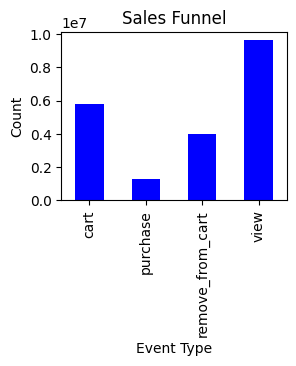

In [ ]:
# Sales Funnel
plt.subplot(2, 2, 1)
sales_funnel.plot(kind='bar', color='blue')
plt.title('Sales Funnel')
plt.xlabel('Event Type')
plt.ylabel('Count')

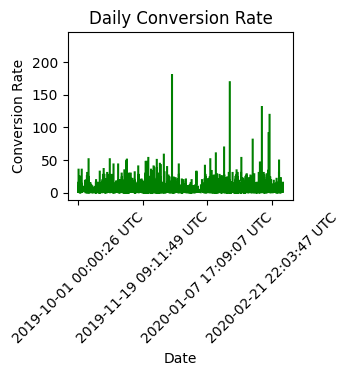

In [ ]:
# Daily Conversion Rate
plt.subplot(2, 2, 2)
conversion_rate.plot(kind='line', color='green')
plt.title('Daily Conversion Rate')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()

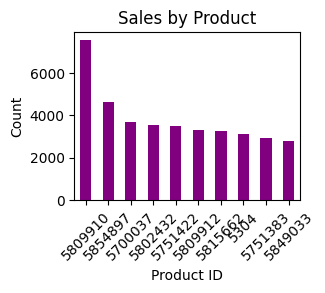

In [ ]:
# Sales by Product
plt.subplot(2, 2, 3)
sales_by_product.plot(kind='bar', color='purple')
plt.title('Sales by Product')
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

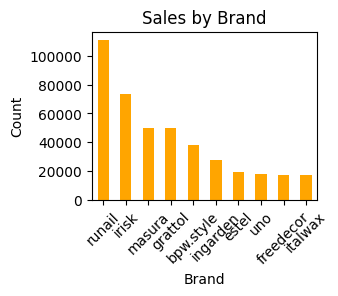

In [ ]:
# Sales by Brand
plt.subplot(2, 2, 4)
sales_by_brand.plot(kind='bar', color='orange')
plt.title('Sales by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

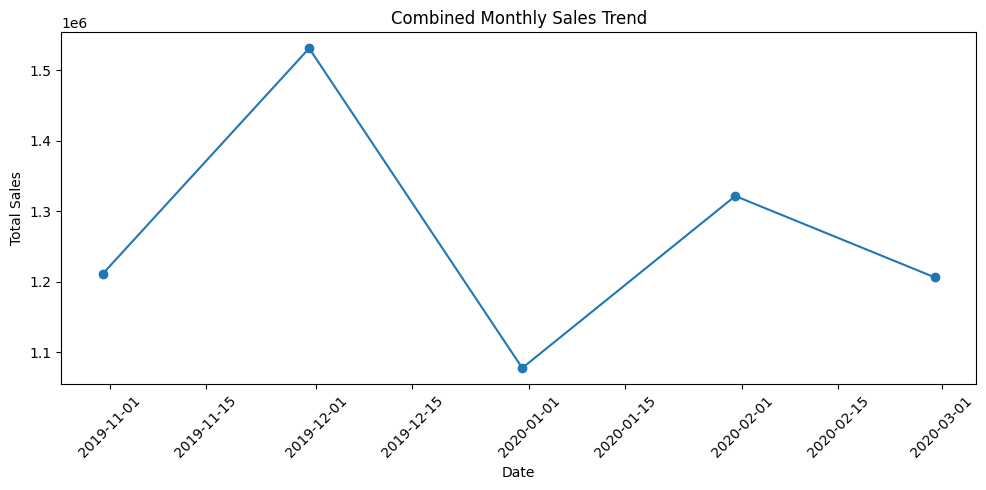

In [10]:

# Directory where your CSV files are located
csv_directory = 'data'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]

# Initialize variables for aggregated data
aggregated_data = None

# Process data in smaller chunks
chunk_size = 10000  # Adjust the chunk size as needed
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        # Filter data for Purchase events
        purchase_chunk=chunk[chunk['event_type']=='purchase'].copy() # make a copy
        # Convert 'event_time' using .loc
        purchase_chunk.loc[:,'event_time'] = pd.to_datetime(purchase_chunk['event_time'].str.replace(' UTC', ''), format='%Y-%m-%d %H:%M:%S')
        monthly_sales = purchase_chunk.set_index('event_time')['price'].resample('M').sum()
        if aggregated_data is None:
            aggregated_data = monthly_sales
        else:
            aggregated_data = aggregated_data.add(monthly_sales, fill_value=0)

# Process and visualize the combined monthly sales
plt.figure(figsize=(10, 5))
plt.plot(aggregated_data.index, aggregated_data.values, marker='o')
plt.title('Combined Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Conversion Funnel Analysis
funnel_counts = data['event_type'].value_counts()

In [ ]:
# Product Performance
top_products = data[data['event_type'] == 'purchase']['product_id'].value_counts().nlargest(10)

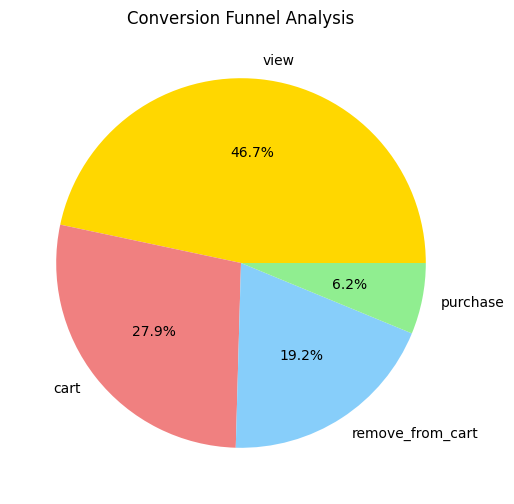

In [ ]:
# Visualize Conversion Funnel Analysis
plt.figure(figsize=(6, 6))
funnel_counts.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Conversion Funnel Analysis')
plt.ylabel('')
plt.show()

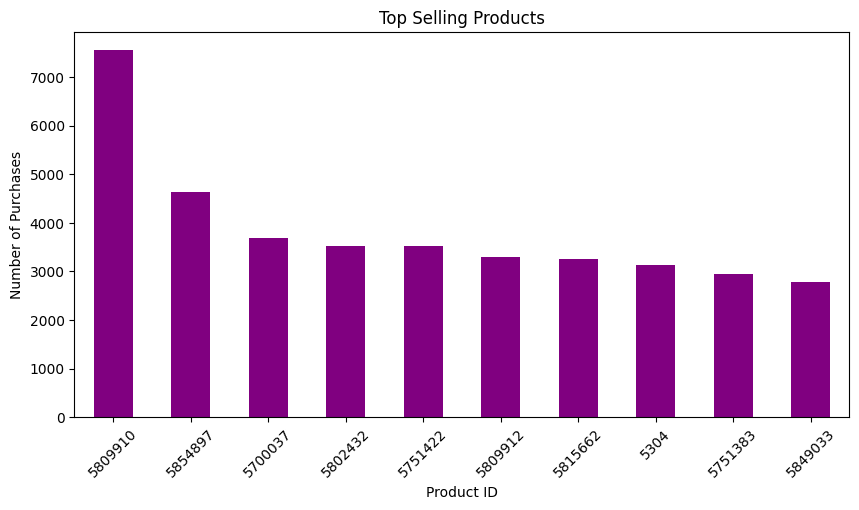

In [ ]:
# Visualize Product Performance
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='purple')
plt.title('Top Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()